<div style="background-color:#3b5998; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h1 align="center" style="color:#ffffff;"><b>Heart Attack Prediction 💔📈</b></h1>
</div>

<div style="background-color:#dfe3ee; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>IMPORT DEPENDENCIES</b></h2>
</div>

In [1]:
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, PowerTransformer, QuantileTransformer, Normalizer, Binarizer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import warnings
warnings.filterwarnings("ignore")
random_seed=42
import matplotlib.pyplot as plt
from IPython.display import HTML, display

<div style="background-color:#dfe3ee; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>DATA PREPARATION and EDA</b></h2>
</div>

In [2]:
heart = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
saturation = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv")
print(heart.shape)
print(saturation.shape)

(303, 14)
(3585, 1)


In [3]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
saturation.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
saturation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   98.6    3585 non-null   float64
dtypes: float64(1)
memory usage: 28.1 KB


In [7]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


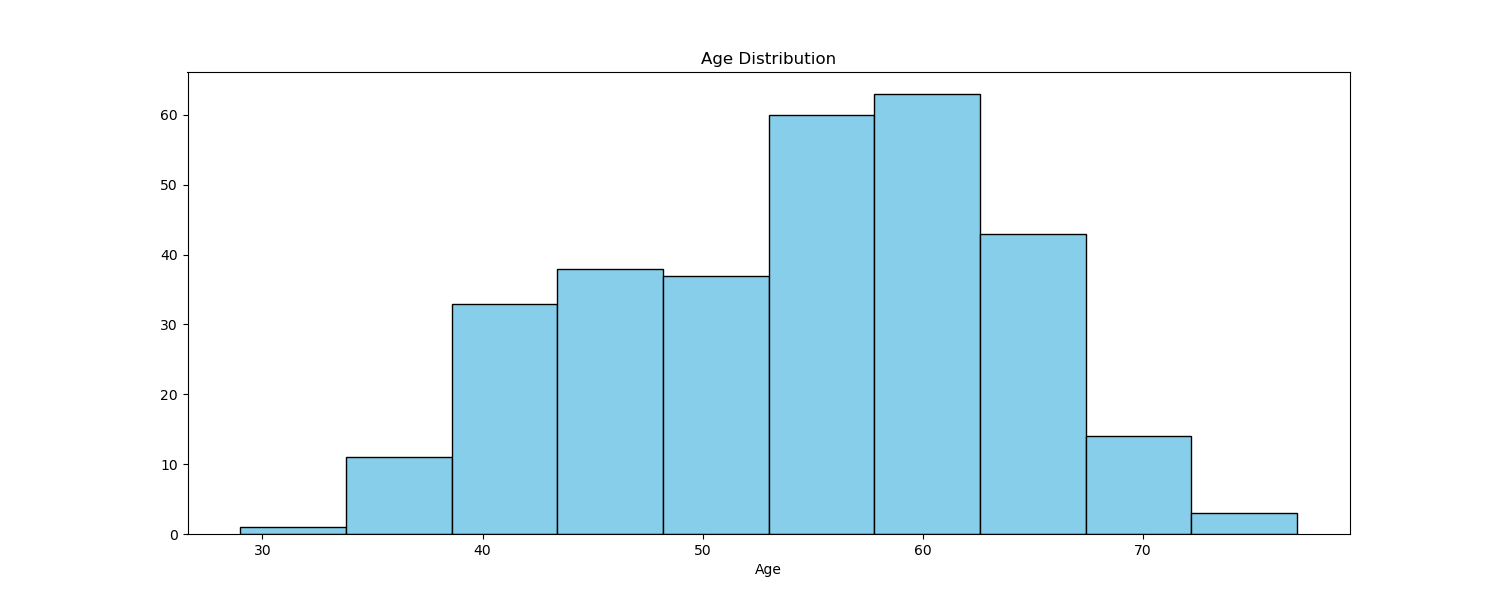

In [8]:
feg, ax = plt.subplots(figsize=(15, 6))
heart["age"].hist(ax=ax, color='skyblue',edgecolor='black')  # Change the bar color to skyblue
plt.xlabel("Age")
plt.title("Age Distribution")
ax.grid(False)  # Remove vertical grid lines
plt.savefig('output_chart.png')
plt.close()

with open("output_chart.png", "rb") as img_file:
    img_data = img_file.read()

import base64
img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))



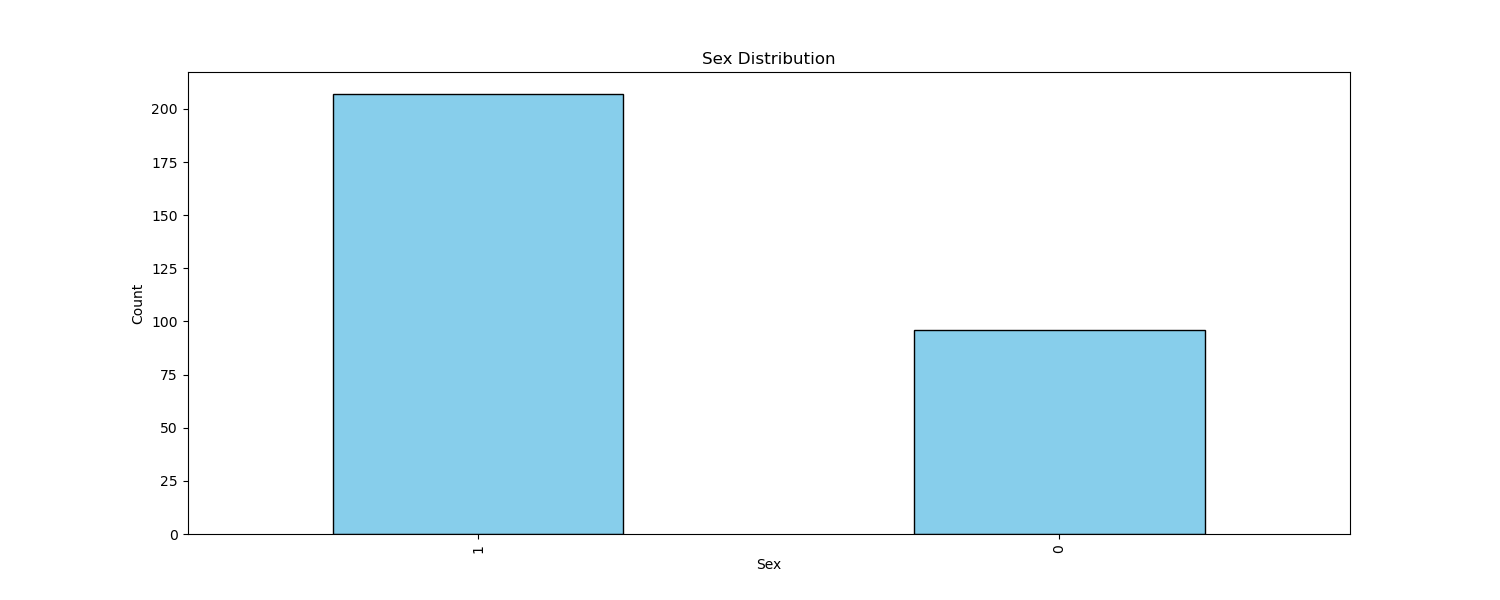

In [9]:
fig, ax = plt.subplots(figsize=(15, 6))
heart['sex'].value_counts().plot(kind='bar', ax=ax,color='skyblue',edgecolor='black')
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Sex Distribution")
ax.grid(False)  # Remove vertical grid lines
plt.savefig('output_bar_chart.png')
plt.close()
with open("output_bar_chart.png", "rb") as img_file:
    img_data = img_file.read()

import base64
img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))


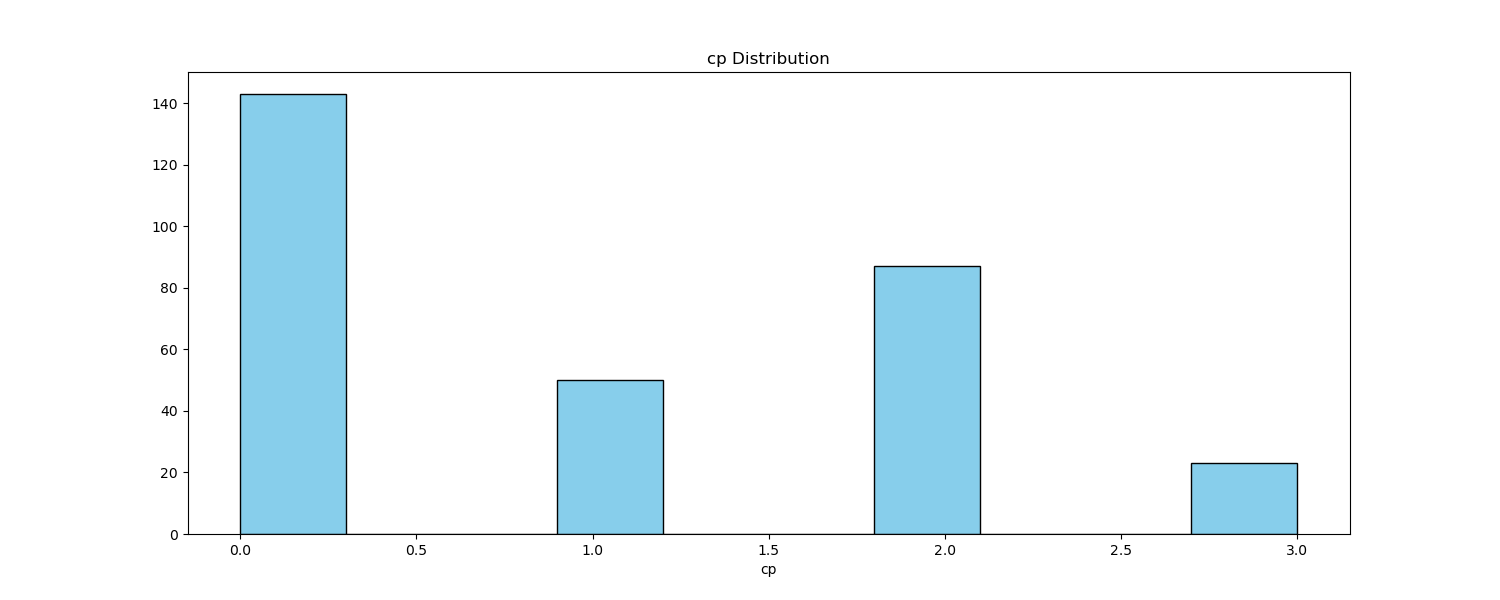

In [10]:
feg, ax = plt.subplots(figsize=(15, 6))
heart["cp"].hist(ax=ax,color='skyblue',edgecolor='black')
plt.xlabel("cp")
plt.title("cp Distribution")
ax.grid(False)  # Remove vertical grid lines
plt.savefig('output_histogram.png')
plt.close()

with open("output_histogram.png", "rb") as img_file:
    img_data = img_file.read()

import base64
img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))


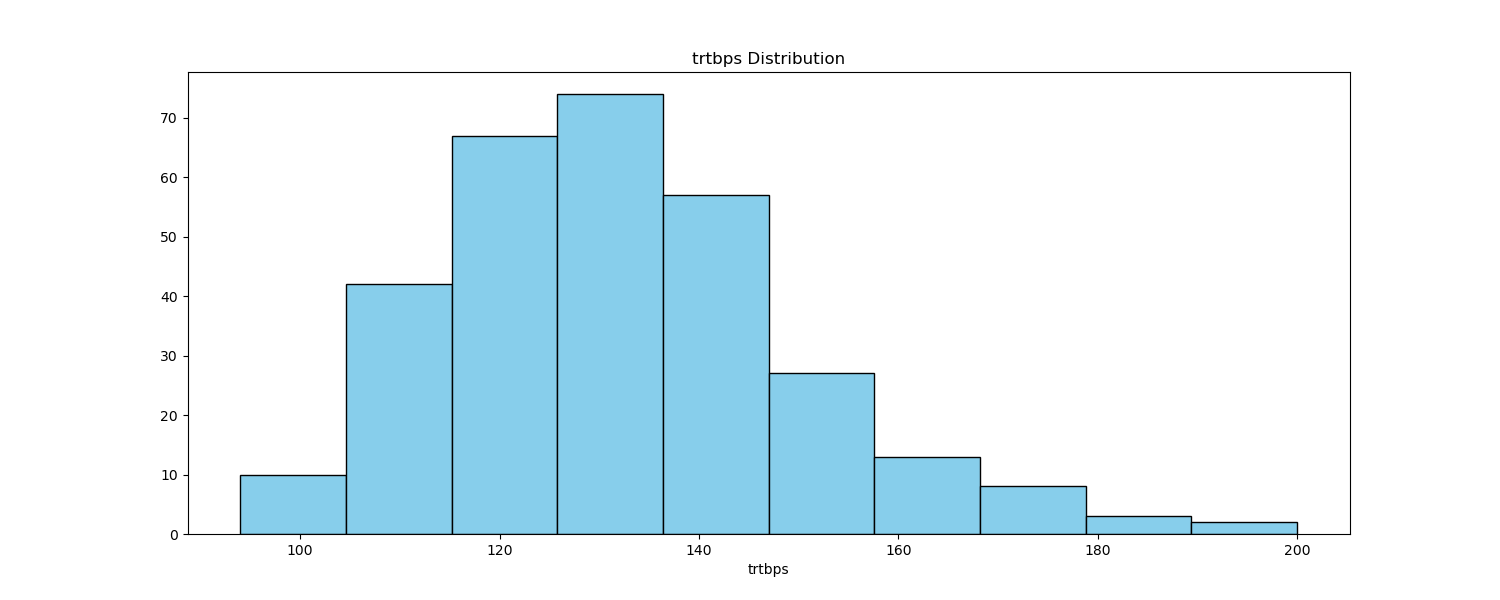

In [11]:
feg, ax = plt.subplots(figsize=(15, 6))
heart["trtbps"].hist(ax=ax,color='skyblue',edgecolor='black')
plt.xlabel("trtbps")
plt.title("trtbps Distribution")
ax.grid(False)  # Remove vertical grid lines
plt.savefig('output_histogram.png')
plt.close()

with open("output_histogram.png", "rb") as img_file:
    img_data = img_file.read()

import base64
img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))


In [12]:
heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


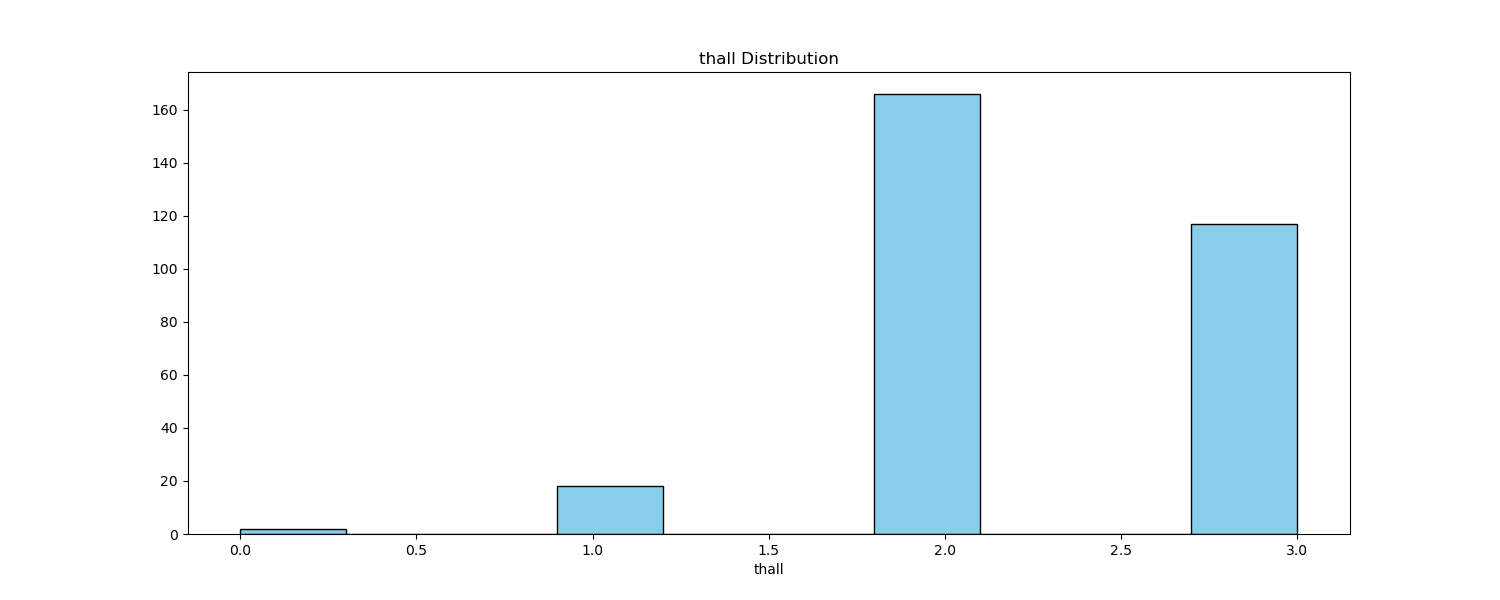

In [13]:
feg, ax = plt.subplots(figsize=(15, 6))
heart["thall"].hist(ax=ax, color='skyblue', edgecolor='black')
plt.xlabel("thall")
plt.title("thall Distribution")
ax.grid(False)  # Remove vertical grid lines
plt.savefig('output_histogram.png')
plt.close()

with open("output_histogram.png", "rb") as img_file:
    img_data = img_file.read()

import base64
img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))



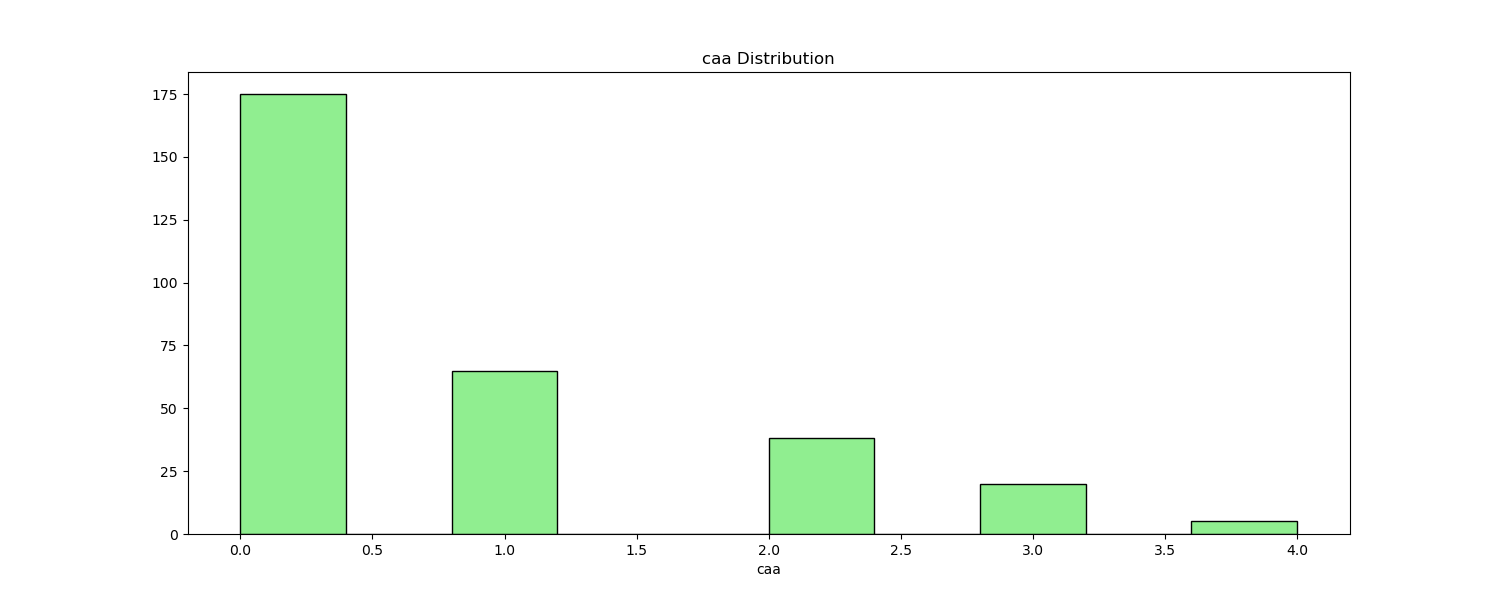

In [14]:
feg, ax = plt.subplots(figsize=(15, 6))
heart["caa"].hist(ax=ax, color='lightgreen', edgecolor='black')
plt.xlabel("caa")
plt.title("caa Distribution")
ax.grid(False)  # Remove vertical grid lines
plt.savefig('output_histogram.png')
plt.close()

with open("output_histogram.png", "rb") as img_file:
    img_data = img_file.read()

import base64
img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))



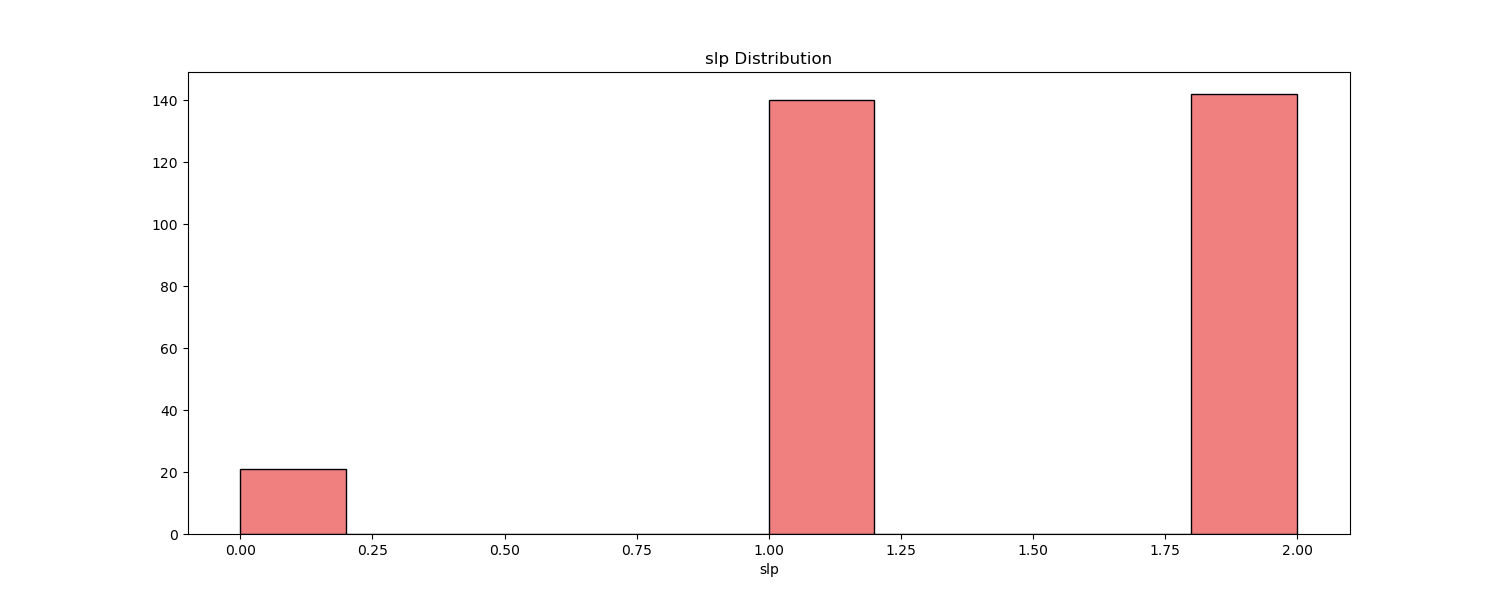

In [15]:
feg, ax = plt.subplots(figsize=(15, 6))
heart["slp"].hist(ax=ax, color='lightcoral', edgecolor='black') 
plt.xlabel("slp")
plt.title("slp Distribution")
ax.grid(False)  # Remove vertical grid lines
plt.savefig('output_histogram.png')
plt.close()

with open("output_histogram.png", "rb") as img_file:
    img_data = img_file.read()

import base64
img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))


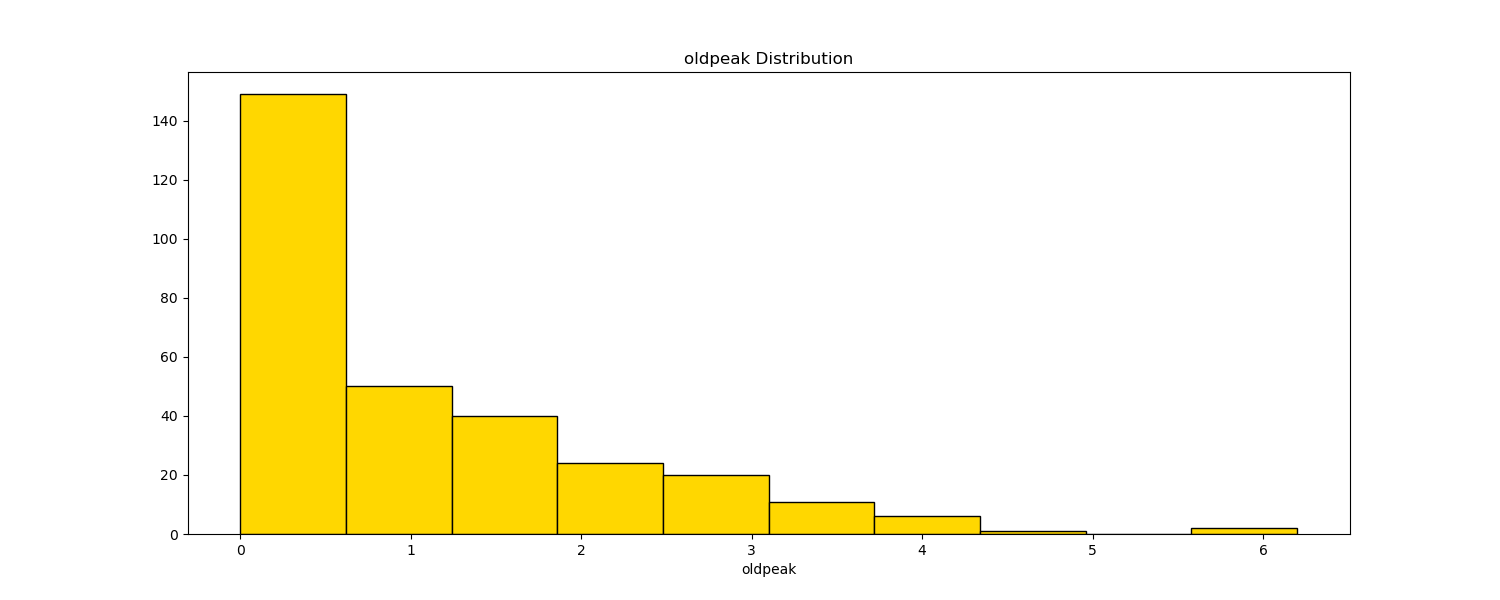

In [16]:
feg, ax = plt.subplots(figsize=(15, 6))
heart["oldpeak"].hist(ax=ax, color='gold', edgecolor='black')
plt.xlabel("oldpeak")
plt.title("oldpeak Distribution")
ax.grid(False)
plt.savefig('output_histogram.png')
plt.close()

with open("output_histogram.png", "rb") as img_file:
    img_data = img_file.read()

import base64
img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))



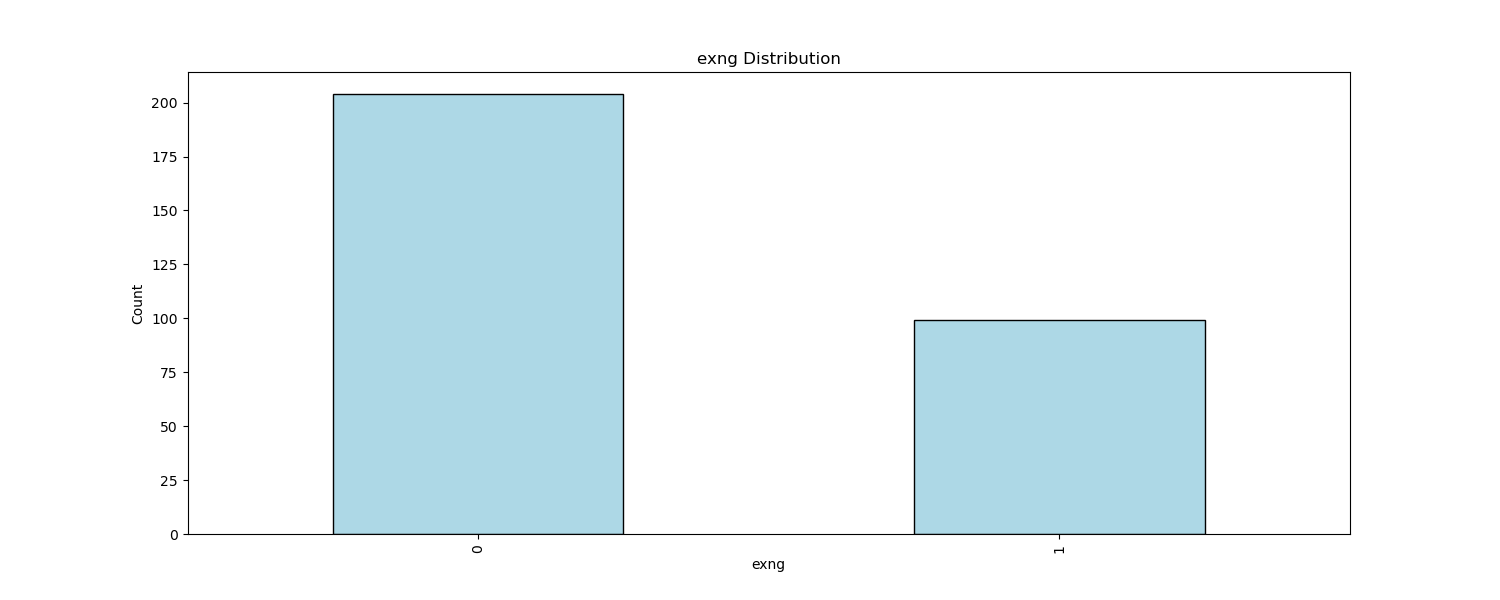

In [17]:
feg, ax = plt.subplots(figsize=(15, 6))
heart["exng"].value_counts().plot(kind='bar', ax=ax, color='lightblue', edgecolor='black')
plt.xlabel("exng")
plt.ylabel("Count")
plt.title("exng Distribution")
ax.grid(False)  # Remove vertical grid lines
plt.savefig('output_bar_chart.png')
plt.close()

with open("output_bar_chart.png", "rb") as img_file:
    img_data = img_file.read()

import base64
img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))



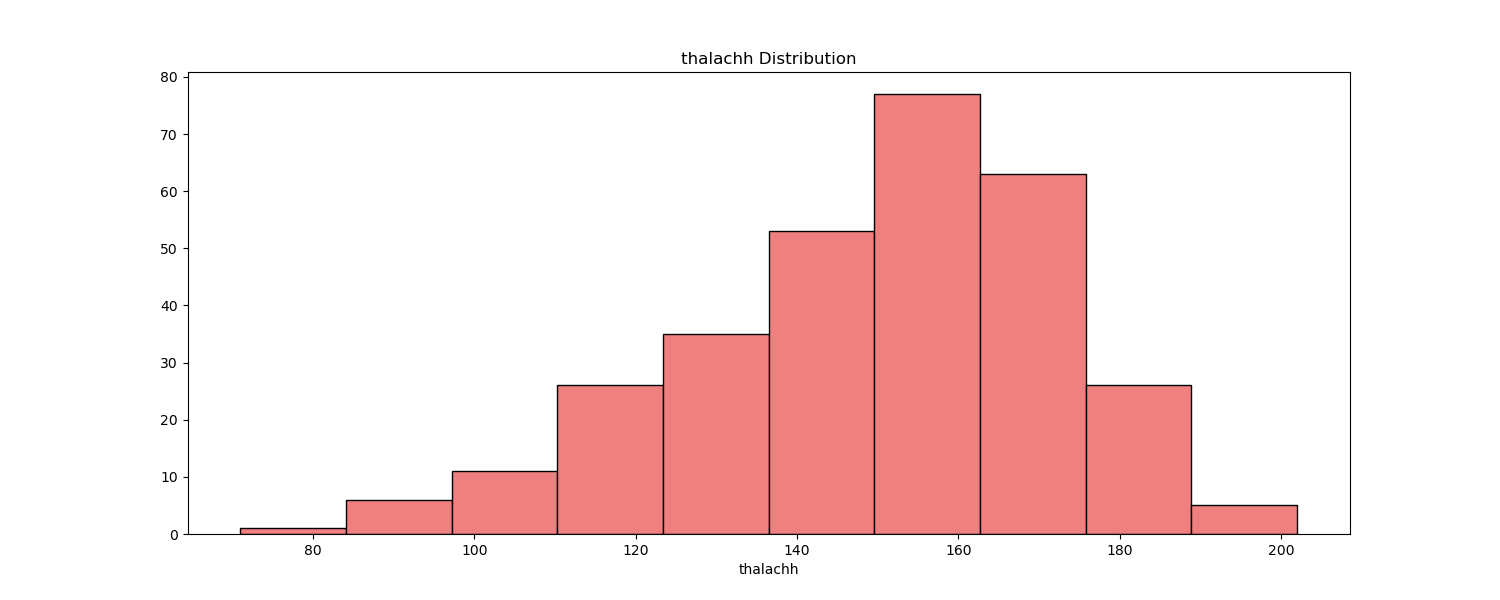

In [18]:
feg, ax = plt.subplots(figsize=(15, 6))
heart["thalachh"].hist(ax=ax, color='lightcoral', edgecolor='black')
plt.xlabel("thalachh")
plt.title("thalachh Distribution")
ax.grid(False)  # Remove vertical grid lines
plt.savefig('output_histogram.png')
plt.close()

with open("output_histogram.png", "rb") as img_file:
    img_data = img_file.read()

import base64
img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))



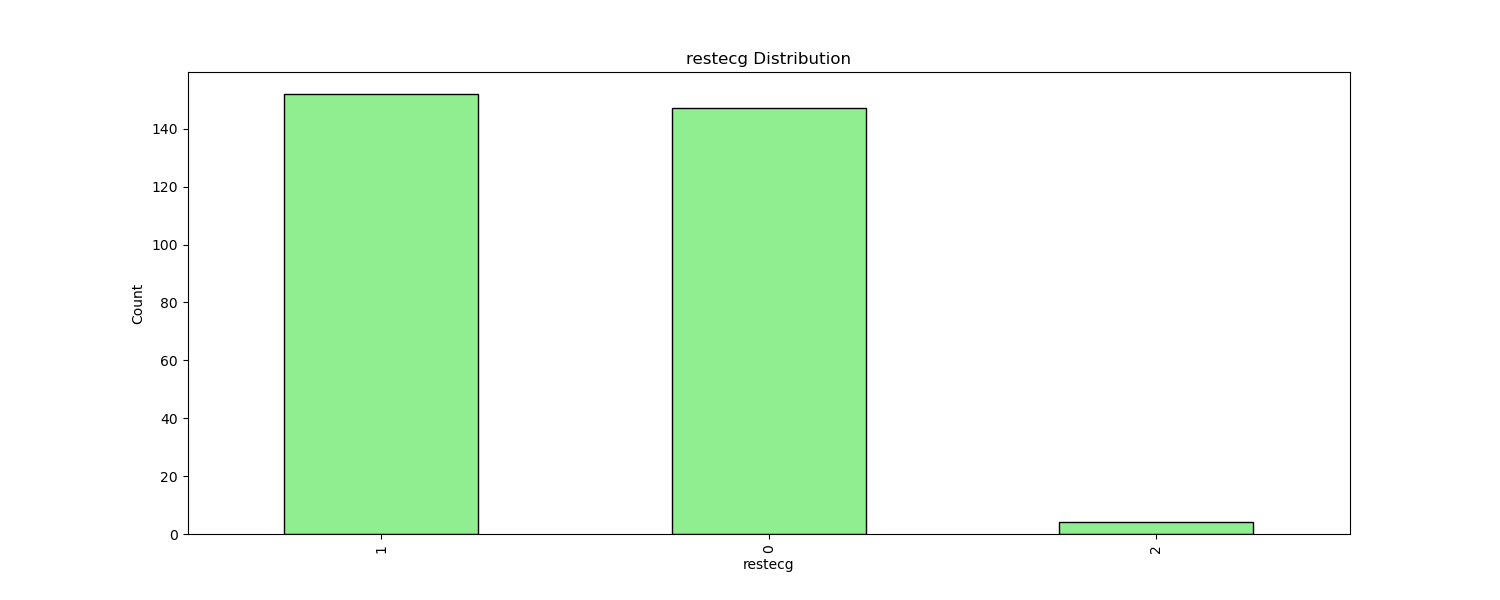

In [19]:
feg, ax = plt.subplots(figsize=(15, 6))
heart["restecg"].value_counts().plot(kind='bar', ax=ax, color='lightgreen', edgecolor='black')
plt.xlabel("restecg")
plt.ylabel("Count")
plt.title("restecg Distribution")
ax.grid(False)  # Remove vertical grid lines
plt.savefig('output_bar_chart.png')
plt.close()

with open("output_bar_chart.png", "rb") as img_file:
    img_data = img_file.read()

import base64
img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))



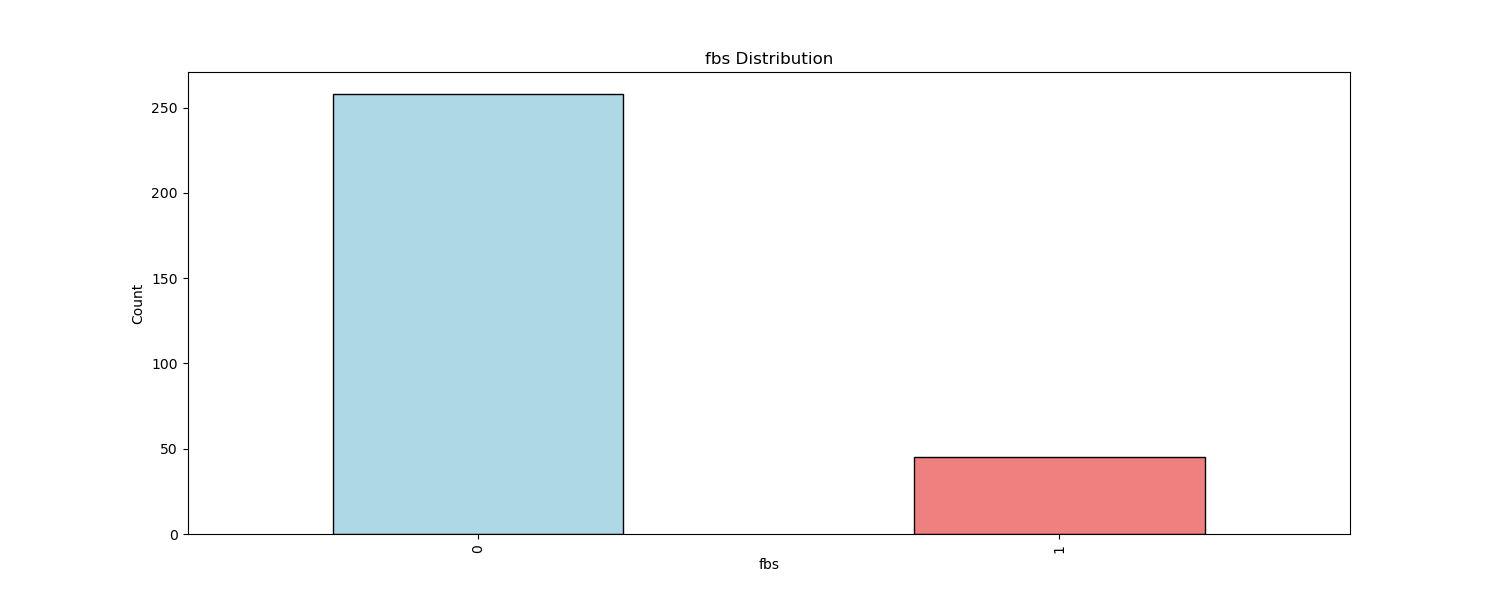

In [20]:
feg, ax = plt.subplots(figsize=(15, 6))
heart["fbs"].value_counts().plot(kind='bar', ax=ax, color=['lightblue', 'lightcoral'], edgecolor='black')
plt.xlabel("fbs")
plt.ylabel("Count")
plt.title("fbs Distribution")
ax.grid(False)  # Remove vertical grid lines
plt.xticks([0, 1], ['0', '1'])  # Label the bars with 0 and 1
plt.savefig('output_bar_chart.png')
plt.close()

with open("output_bar_chart.png", "rb") as img_file:
    img_data = img_file.read()

import base64
img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))



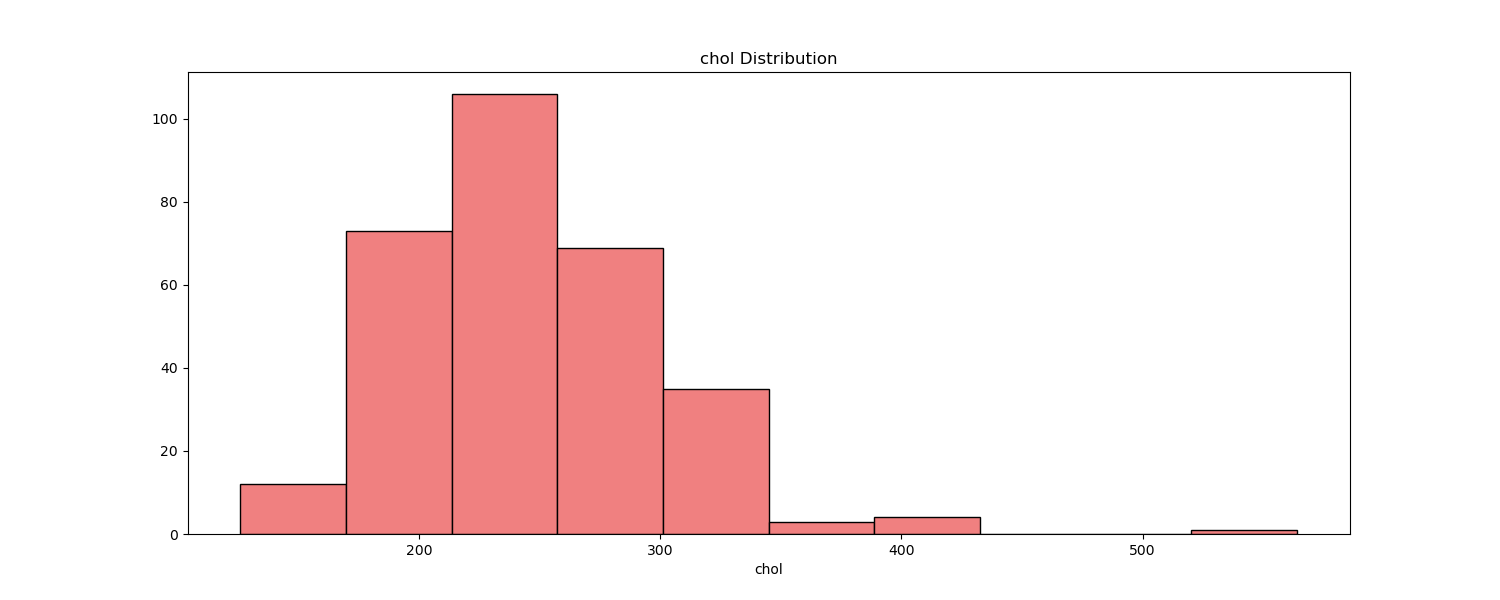

In [21]:
feg, ax = plt.subplots(figsize=(15, 6))
heart["chol"].hist(ax=ax, color='lightcoral', edgecolor='black')
plt.xlabel("chol")
plt.title("chol Distribution")
ax.grid(False)  # Remove vertical grid lines
plt.savefig('output_histogram.png')
plt.close()

with open("output_histogram.png", "rb") as img_file:
    img_data = img_file.read()

import base64
img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))



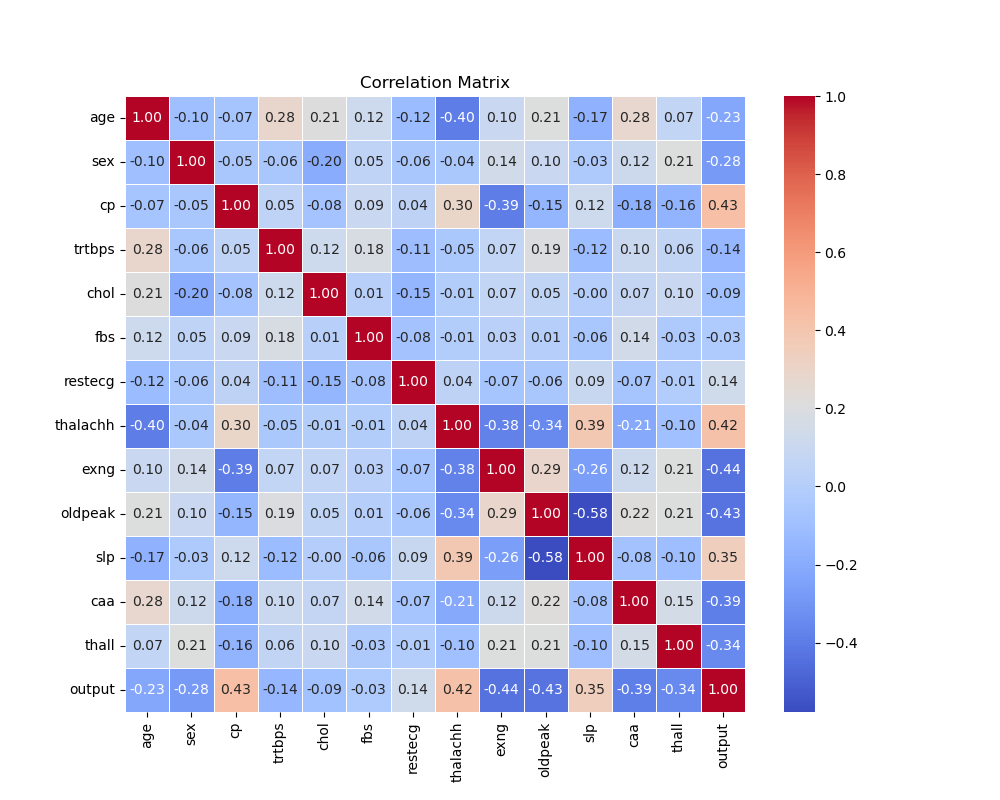

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display


corr = heart.corr()

feg, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)

plt.title("Correlation Matrix")
plt.savefig('output_heatmap.png')
plt.close()

with open("output_heatmap.png", "rb") as img_file:
    img_data = img_file.read()

import base64
img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))


<div style="background-color:#dfe3ee; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>BUILD/TRAIN MODEL</b></h2>
</div>

In [23]:
from sklearn.model_selection import train_test_split
X = heart.drop(["output"],axis=1)
Y = heart['output']
oversampler = RandomOverSampler(random_state=random_seed)
X_resampled, Y_resampled = oversampler.fit_resample(X, Y)
X_train,X_test,Y_train,Y_test = train_test_split(X_resampled, Y_resampled,test_size=0.3)

In [24]:
logging.getLogger("xgboost").setLevel(logging.WARNING)
logging.getLogger("catboost").setLevel(logging.WARNING)

classifiers = [
    LogisticRegression(random_state=random_seed),
    KNeighborsClassifier(),
    SVC(random_state=random_seed),
    DecisionTreeClassifier(random_state=random_seed),
    RandomForestClassifier(random_state=random_seed),
    GradientBoostingClassifier(verbose=0, random_state=random_seed),
    AdaBoostClassifier(random_state=random_seed),
    GaussianNB(),
    MLPClassifier(random_state=random_seed),
    XGBClassifier(verbosity=0, random_state=random_seed),
    ExtraTreesClassifier(random_state=random_seed),
    CatBoostClassifier(verbose=0, random_state=random_seed)
]

scalers = [
    StandardScaler(),
    MinMaxScaler(),
    MaxAbsScaler(),
    RobustScaler(),
    PowerTransformer(),
    QuantileTransformer(),
    Normalizer(),
    Binarizer()
]

results = []
for scaler in scalers:
    for classifier in classifiers:
        pipeline = Pipeline([
            ('scaler', scaler),
            ('classifier', classifier)
        ])

        scores = cross_val_score(pipeline, X_resampled, Y_resampled, cv=5, scoring='accuracy')

        y_pred = cross_val_predict(pipeline, X_resampled, Y_resampled, cv=5)
        accuracy = accuracy_score(Y_resampled, y_pred)
        recall = recall_score(Y_resampled, y_pred, average='weighted')
        precision = precision_score(Y_resampled, y_pred, average='weighted')
        f1 = f1_score(Y_resampled, y_pred, average='weighted')
        
        results.append((classifier.__class__.__name__, scaler.__class__.__name__, accuracy, recall, precision, f1))

In [25]:
results = pd.DataFrame(results, columns=['Classifier', 'Scaler', 'Accuracy', 'Recall', 'Precision', 'F1-Score'])
results = results.sort_values(by='Accuracy', ascending=False)
results.head()

,Classifier,Scaler,Accuracy,Recall,Precision,F1-Score
40,RandomForestClassifier,RobustScaler,0.857576,0.857576,0.857904,0.857543
4,RandomForestClassifier,StandardScaler,0.857576,0.857576,0.857904,0.857543
64,RandomForestClassifier,QuantileTransformer,0.854545,0.854545,0.854754,0.854524
28,RandomForestClassifier,MaxAbsScaler,0.854545,0.854545,0.854598,0.854540
16,RandomForestClassifier,MinMaxScaler,0.854545,0.854545,0.854598,0.854540


In [26]:
model = Pipeline([
    ('scaler',RobustScaler()),
    ('classifier',RandomForestClassifier())
])
model.fit(X_train,Y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('classifier', RandomForestClassifier())])

In [27]:
model.score(X_test,Y_test)

0.8383838383838383